In [1]:
#Using the spark session to get an sql 
import pyspark as ps
spark = ps.sql.SparkSession.builder.getOrCreate()

In [2]:
#Import other useful libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#This provides us with a way of getting an sql dataframe with a schema that structures the data
bigdata = spark.read.csv(r'C:\Users\matom\OneDrive\Documents\Data Science\MIT Big Data\MIT805\multiproductdata.csv', header = True, inferSchema=True)

**Exploratory Data Analysis**

In [3]:
#Now we can see the schema of the dataframe using the following command
bigdata.printSchema()

root
 |-- event_time: timestamp (nullable = true)
 |-- event_type: string (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- category_id: long (nullable = true)
 |-- category_code: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- user_session: string (nullable = true)



In [6]:
#Let's check the description of our dataset
bigdata.describe().toPandas()

,summary,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,count,67501979,67501979,67501979,45603808,58283744,67501979,67501979,67501969
1,mean,None,1.2514064889882294E7,2.0578976443190984E18,None,NaN,292.45931656461437,5.386397456296759E8,None
2,stddev,None,1.725741362984622E7,2.0125490328842856E16,None,NaN,355.67449958606784,2.288516105152206E7,None
3,min,cart,1000365,2053013552226107603,accessories.bag,a-case,0.0,10300217,0000007c-adbf-4ed7-af17-d1fef9763d67
4,max,view,100028554,2187707861038006932,stationery.cartrige,zyxel,2574.07,579969851,fffffde2-4522-4b44-8a32-510c55739ba1


In [4]:
#Let's remove null values from our dataset, since they will not provide us with any sort of insight
clean_bigdata = bigdata.dropna(how='any')

In [4]:
#Length of the columns in my dataframe
len(bigdata.columns)

9

In [8]:
#Check the count of the rows in my original dataframe
bigdata.count()

67501979

In [9]:
#Check the count of the rows in my dataframe without any nulls
clean_bigdata.count()

42089564

In [6]:
clean_bigdata.select("event_time","brand","user_session").show(5)

+-------------------+------+--------------------+
|         event_time| brand|        user_session|
+-------------------+------+--------------------+
|2019-11-01 02:00:00|xiaomi|4d3b30da-a5e4-49d...|
|2019-11-01 02:00:00|janome|8e5f4f83-366c-4f7...|
|2019-11-01 02:00:01| creed|755422e7-9040-477...|
|2019-11-01 02:00:01|    lg|3bfb58cd-7892-48c...|
|2019-11-01 02:00:01|xiaomi|313628f1-68b8-460...|
+-------------------+------+--------------------+
only showing top 5 rows



In [5]:
#Creating subsets of the dataframe
purchase_data = clean_bigdata.filter(clean_bigdata.event_type =="purchase")
#view_data = clean_bigdata.filter(clean_bigdata.event_type == "view")
#cart_data = clean_bigdata.filter(clean_bigdata.event_type == "cart")

In [17]:
purchase_data.toPandas().head(5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 02:01:04,purchase,1005161,2053013555631882655,electronics.smartphone,xiaomi,211.92,513351129,e6b7ce9b-1938-4e20-976c-8b4163aea11d
1,2019-11-01 02:04:51,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,128.42,562958505,0f039697-fedc-40fa-8830-39c1a024351d
2,2019-11-01 02:06:33,purchase,1801881,2053013554415534427,electronics.video.tv,samsung,488.80,557746614,4d76d6d3-fff5-4880-8327-e9e57b618e0e
3,2019-11-01 02:06:34,purchase,5800823,2053013553945772349,electronics.audio.subwoofer,nakamichi,123.56,514166940,8ef5214a-86ad-4d0b-8df3-4280dd411b47
4,2019-11-01 02:07:38,purchase,30000218,2127425436764865054,construction.tools.welding,magnetta,254.78,515240495,0253151d-5c84-4809-ba02-38ac405494e1


<AxesSubplot:xlabel='price', ylabel='Count'>

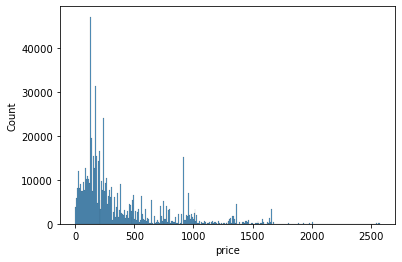

In [19]:
#Visualize the purchase_data
sns.histplot(purchase_data.toPandas()['price'])

In [6]:
sns.histplot(view_data.toPandas()['price'])

ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it

In [22]:
sns.histplot(cart_data.toPandas()['price'])

ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it

In [7]:
#Group the purchases by brand & product category
purchase_data.toPandas().groupby('brand').sum('price')


,product_id,category_id,price,user_id
brand,,,,
a-elita,3.290008e+07,2.055157e+18,8.49,5.239640e+08
aardwolf,2.163066e+08,1.437109e+19,219.10,3.863416e+09
acer,1.314051e+10,1.314685e+22,3347306.53,3.477099e+12
aces,5.800951e+06,2.053014e+18,86.49,5.380641e+08
acme,5.969742e+08,1.539760e+20,3793.57,4.093882e+10
...,...,...,...,...
zongshen,7.160028e+07,8.212054e+18,931.48,2.064409e+09
zoom,2.300317e+06,2.053014e+18,177.61,5.714990e+08
zotac,4.690662e+07,1.437109e+19,1906.14,3.926525e+09


In [ ]:
x2 = purchase_data.toPandas().groupby('brand').sum('price')['brand']
y2 = purchase_data.toPandas().groupby('brand').sum('price')['price']

In [8]:
#Now we want to see how many unique user sessions do we have in our dataset
Number_unique_user_sessions = clean_bigdata.select("user_session").distinct().count()
print(f"Total number of unique user sessions: {Number_unique_user_sessions}")

ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it

In [9]:
#Now we want to understand for the time period under scrutiny what is the total number of unique customers that visited our site
Number_unique_user_id = bigdata.select("user_id").distinct().count()
print(f"Total number of unique user sessions: {Number_unique_user_id}")

ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it

In [9]:
#Now we want to check the price range and stastical measures for products on our site
bigdata.describe("price").show()

+-------+------------------+
|summary|             price|
+-------+------------------+
|  count|          67501979|
|   mean|292.45931656461437|
| stddev|355.67449958606784|
|    min|               0.0|
|    max|           2574.07|
+-------+------------------+



In [10]:
#We can also look at the brands and events associated with each brand
bigdata.groupby("brand").count().show()

+-------------+------+
|        brand| count|
+-------------+------+
|     yokohama|128697|
|      edifier|  3565|
|        welss|  4929|
|      tuffoni|  3617|
|         tega|  2317|
|      serebro|  7105|
|        crest|   325|
|         tmnt|   574|
|       alutec|  2587|
|        sonel| 11501|
|     nocnezna|   250|
|     nutricia|  2496|
|      bombbar|   852|
|trianglegroup|    97|
|      keenway|  2368|
|        sigma|  2424|
|        goo.n|  1031|
|      fitwell|   532|
| belaakalitva|   218|
|       marley|  1063|
+-------------+------+
only showing top 20 rows



In [ ]:
#We can also look at the spend by category_code and by brand, but first we need to see what event actually occurred. Only Event = purchase will be considered.
bigdata.groupby("event_type","price").sum().show()